# Pomysł
Zrobić wykres https://datavizproject.com/data-type/proportional-area-chart/ korzystając z danych https://en.wikipedia.org/wiki/List_of_highest-grossing_media_franchises ew z tego https://en.wikipedia.org/wiki/List_of_best-selling_video_game_franchises 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify 
import matplotlib.patches as patches

In [10]:
df=pd.read_excel('franchise_worth.xlsx')
df

,franchise,year of inception,total revenue (est. US$),original medium,creator,owner
0,Pokémon,1996,115000000000,Video game,Satoshi Tajiri,The Pokémon Company; Nintendo
1,Mickey Mouse & Friends,1928,61200000000,Animated cartoon,Walt Disney; Ub Iwerks,The Walt Disney Company
2,Winnie the Pooh,1924,50200000000,Book,A. A. Milne; E. H. Shepard,The Walt Disney Company
3,Star Wars,1977,46700000000,Film,George Lucas,Lucasfilm (The Walt Disney Company)
4,Disney Princess,2000,45400000000,Animated films,Andy Mooney,The Walt Disney Company
5,Anpanman,1973,38300000000,Picture book,Takashi Yanase,Froebel-kan (Toppan Printing Co.)
6,Barbie,1987,36300000000,Television special,Ruth Handler,Mattel
7,Marvel Cinematic Universe,2008,35200000000,Film,Marvel Studios; Stan Lee; Jack Kirby,"Walt Disney Studios (The Walt Disney Company),..."
8,Wizarding World (Harry Potter),1997,34700000000,Novel,J. K. Rowling,"J. K. Rowling (books), Warner Bros. (Warner Br..."
9,Hello Kitty,1974,33500000000,Cartoon character[139],Yuko Shimizu; Shintaro Tsuji,Sanrio


/var/folders/ks/l5k0stm95w5b5kn73hwp_8hc0000gn/T/ipykernel_97296/3771977688.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Spectral')


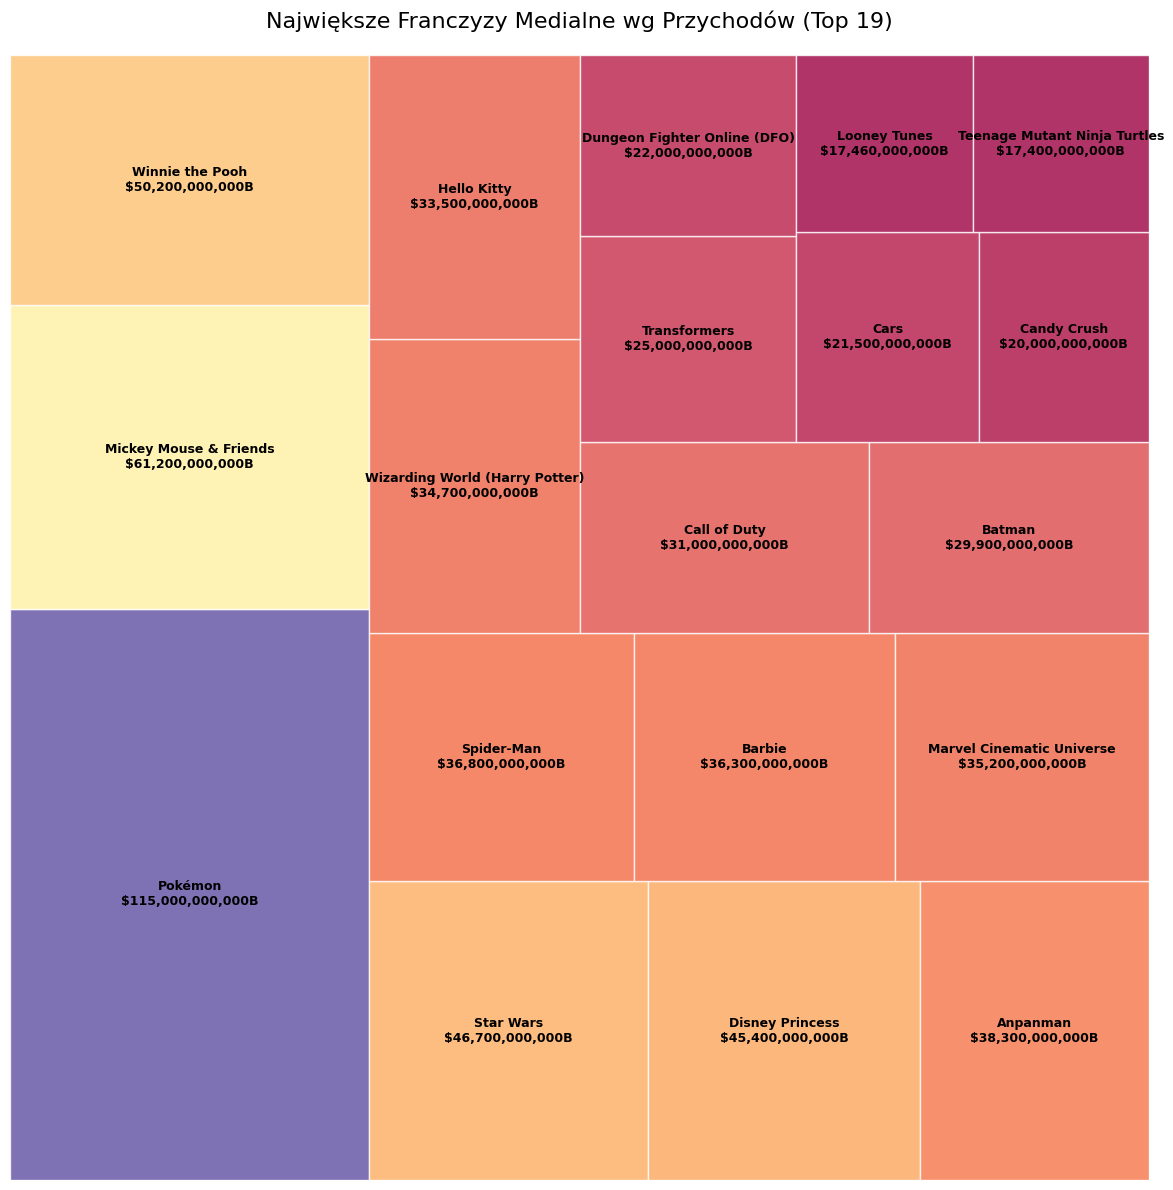

In [21]:

# 2. Czyszczenie kolumny Revenue
# Funkcja usuwająca '$', 'billion', 'est.' i zamieniająca na liczby
def clean_revenue(val):
    if pd.isna(val): return 0
    val = str(val).lower()
    val = val.replace('$', '').replace('est.', '').replace('billion', '').replace(',', '').strip()
    try:
        return float(val)
    except ValueError:
        return 0

col_revenue = 'total revenue (est. US$)'
col_franchise = 'franchise'

# Aplikujemy czyszczenie
df['clean_revenue'] = df[col_revenue].apply(clean_revenue)

# Sortujemy malejąco (największe na górze) i bierzemy np. TOP 50, żeby wykres był czytelny
# Jeśli chcesz wszystkie, usuń .head(50)
df_plot = df.sort_values('clean_revenue', ascending=False).head(20)

# --- 3. Przygotowanie danych do wykresu ---
sizes = df_plot['clean_revenue'].values
labels = df_plot[col_franchise].values

# Etykiety z kwotą (np. "Pokémon\n$90B")
plot_labels = [f'{label}\n${value:,.0f}B' for label, value in zip(labels, sizes)]

# Kolory (Spectral wygląda dobrze przy dużej liczbie elementów)
cmap = plt.cm.get_cmap('Spectral')
norm = plt.Normalize(min(sizes), max(sizes))
colors = [cmap(norm(value)) for value in sizes]

# --- 4. Rysowanie Treemapy ---
plt.figure(figsize=(12, 12)) # Kwadratowy rozmiar sprzyja kwadratowym kafelkom

squarify.plot(
    sizes=sizes,
    label=plot_labels,
    color=colors,
    alpha=0.8,
    bar_kwargs={'linewidth': 1, 'edgecolor': 'white'},
    text_kwargs={'fontsize': 9, 'color': 'black', 'weight': 'bold'}
)

plt.title(f'Największe Franczyzy Medialne wg Przychodów (Top {len(df_plot)})', fontsize=16, pad=20)
plt.axis('off')

plt.tight_layout()
plt.savefig('franchise_revenue_treemap.png')

In [12]:
df2=pd.read_excel('games_franchise_worth.xlsx')
df2

,franchise,sales (millions),debut year,publisher(s)
0,Mario,893.5,1983,Nintendo
1,Tetris,520.0,1988,Various
2,Call of Duty,500.0,2003,Activision
3,Pokémon,489.0,1996,Nintendo; The Pokémon Company
4,Grand Theft Auto,460.0,1997,Rockstar Games
5,Minecraft,350.0,2011,Mojang Studios
6,FIFA,325.0,1993,Electronic Arts
7,Assassin's Creed,230.0,2007,Ubisoft
8,Final Fantasy,204.0,1987,Square Enix
9,Wii,204.0,2006,Nintendo


/var/folders/ks/l5k0stm95w5b5kn73hwp_8hc0000gn/T/ipykernel_97296/377747714.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Spectral')


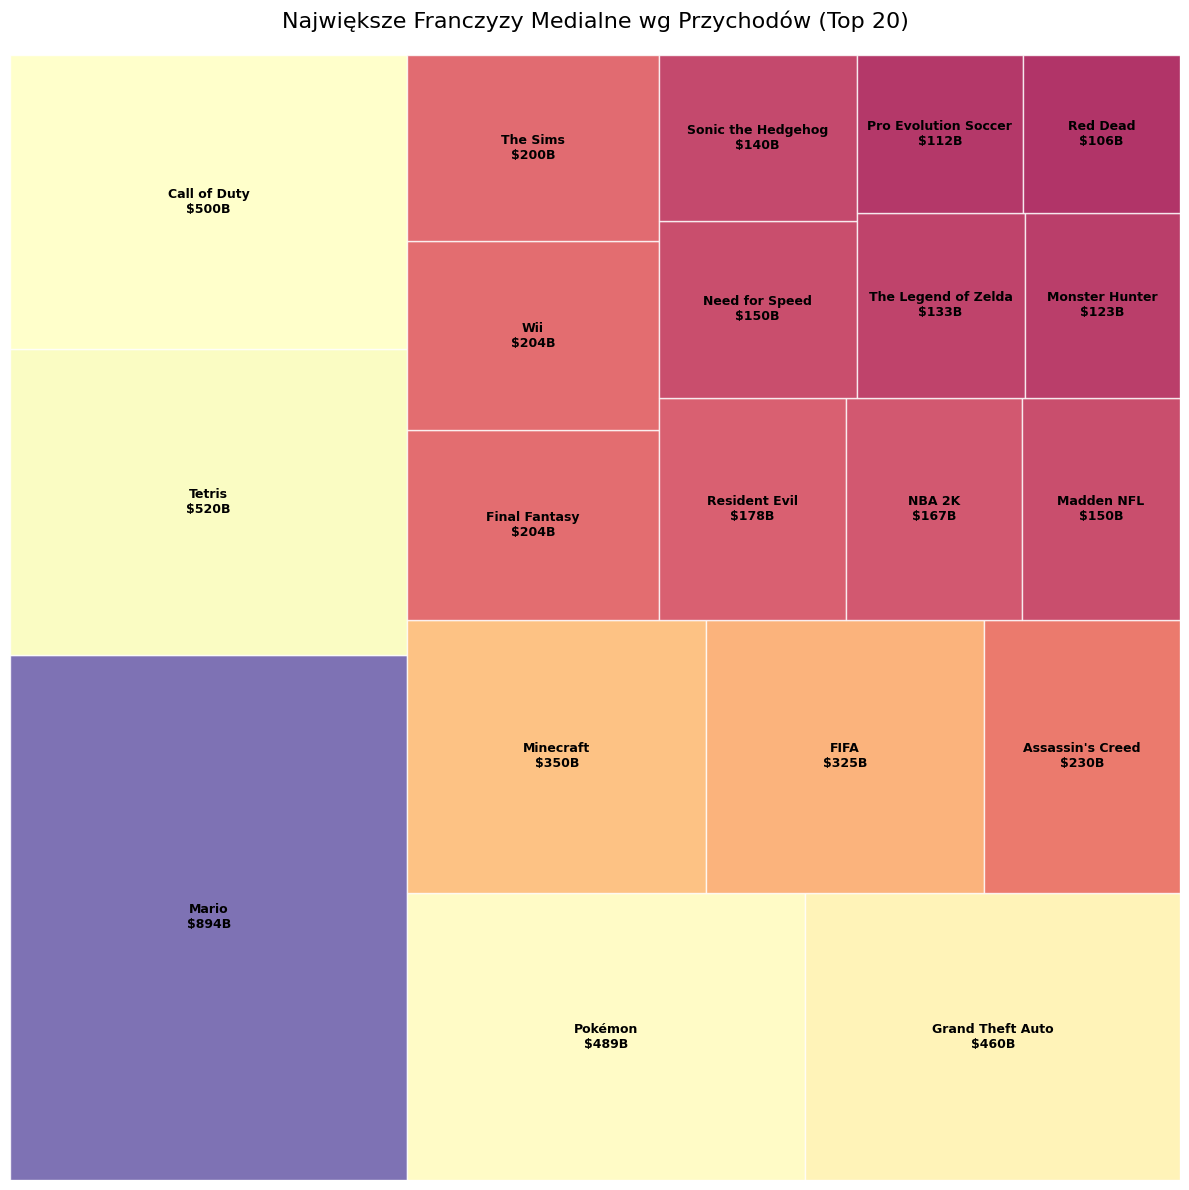

In [16]:
try:

    
    # 2. Czyszczenie kolumny Revenue
    # Funkcja usuwająca '$', 'billion', 'est.' i zamieniająca na liczby
    def clean_revenue(val):
        if pd.isna(val): return 0
        val = str(val).lower()
        val = val.replace('$', '').replace('est.', '').replace('billion', '').replace(',', '').strip()
        try:
            return float(val)
        except ValueError:
            return 0

    col_revenue = 'sales (millions)'
    col_franchise = 'franchise'

    # Aplikujemy czyszczenie
    df2['clean_revenue'] = df2[col_revenue].apply(clean_revenue)
    
    # Sortujemy malejąco (największe na górze) i bierzemy np. TOP 50, żeby wykres był czytelny
    # Jeśli chcesz wszystkie, usuń .head(50)
    df_plot = df2.sort_values('clean_revenue', ascending=False).head(20)
    
    # --- 3. Przygotowanie danych do wykresu ---
    sizes = df_plot['clean_revenue'].values
    labels = df_plot[col_franchise].values
    
    # Etykiety z kwotą (np. "Pokémon\n$90B")
    plot_labels = [f'{label}\n${value:,.0f}B' for label, value in zip(labels, sizes)]

    # Kolory (Spectral wygląda dobrze przy dużej liczbie elementów)
    cmap = plt.cm.get_cmap('Spectral')
    norm = plt.Normalize(min(sizes), max(sizes))
    colors = [cmap(norm(value)) for value in sizes]

    # --- 4. Rysowanie Treemapy ---
    plt.figure(figsize=(12, 12)) # Kwadratowy rozmiar sprzyja kwadratowym kafelkom
    
    squarify.plot(
        sizes=sizes,
        label=plot_labels,
        color=colors,
        alpha=0.8,
        bar_kwargs={'linewidth': 1, 'edgecolor': 'white'},
        text_kwargs={'fontsize': 9, 'color': 'black', 'weight': 'bold'}
    )
    
    plt.title(f'Największe Franczyzy Medialne wg Przychodów (Top {len(df_plot)})', fontsize=16, pad=20)
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('franchise_revenue_treemap.png')
    plt.show()

except Exception as e:
    print(f"Błąd: {e}")
    print("Sprawdź nazwę pliku i czy masz zainstalowane: pandas, matplotlib, squarify, openpyxl")